In [1]:
import pandas as pd
import numpy as np
# Plot the confusion matrix
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
csv = pd.read_csv("../csvs/predictions_log_zuericrop_8.csv")

In [6]:
# Remove all the True Label == 0
#csv = csv[csv["True Label"] != 0]
#csv = csv[(csv["True Label"] < 5)& (csv["Predicted Label"] < 5)]

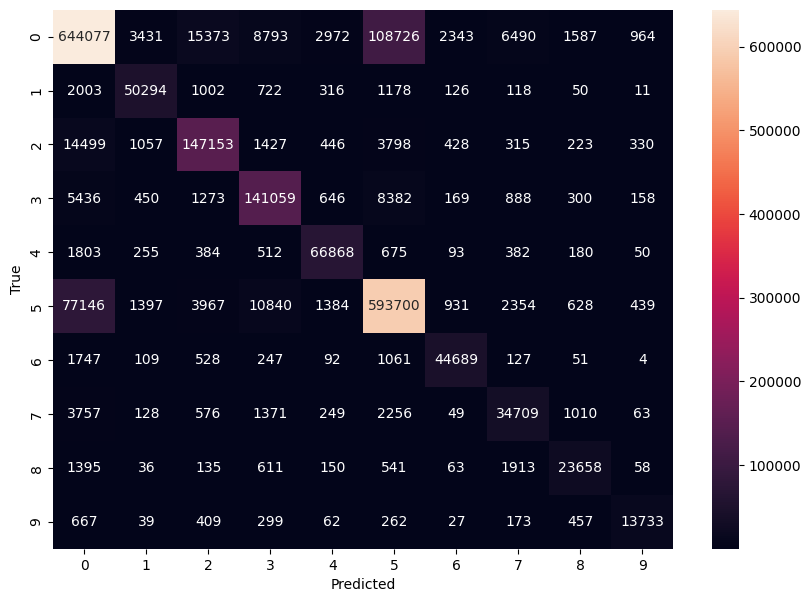

In [7]:


cm = confusion_matrix(csv["True Label"], csv["Predicted Label"])
plt.figure(figsize=(10, 7))
sns.heatmap(cm, annot=True, fmt="d")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.savefig("confusion_matrix.png")
plt.show()


In [8]:
# Can you compute the overall accuracy, mean accuracy and mean intersection over union?

# Overall accuracy
overall_accuracy = cm.diagonal().sum() / cm.sum()
print(f"Overall accuracy: {overall_accuracy *100}")

# Mean accuracy
mean_accuracy = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
mean_accuracy = mean_accuracy.mean()

print(f"Mean accuracy: {mean_accuracy*100}")

# Mean intersection over union
intersection = cm.diagonal()
union = cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal()
iou = intersection / union
miou = iou.mean()

print(f"Mean intersection over union: {miou*100}")

# F1 score
precision = np.where(cm.sum(axis=0) != 0, cm.diagonal() / cm.sum(axis=0), 0)
recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)

# Calculate F1-score, handling cases where precision + recall = 0
f1 = np.where(
    (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
)

# Compute mean F1-score
f1 = f1.mean()

print(f"Mean F1-score: {f1*100}")

Overall accuracy: 84.5916774332472
Mean accuracy: 86.47464634762663
Mean intersection over union: 75.56421820243864
Mean F1-score: 85.90283347012102


In [9]:
# Accuracy per class
accuracy_per_class = cm.diagonal() / cm.sum(axis=1)
print(f"Accuracy per class: {accuracy_per_class}")

# Intersection over union per class
intersection = cm.diagonal()  # True positives
union = (
    cm.sum(axis=0) + cm.sum(axis=1) - cm.diagonal()
)  # True positives + False positives + False negatives
iou = intersection / union

print(f"Intersection over union per class: {iou}")

# F1 score per class
precision = np.where(cm.sum(axis=0) != 0, cm.diagonal() / cm.sum(axis=0), 0)
recall = np.where(cm.sum(axis=1) != 0, cm.diagonal() / cm.sum(axis=1), 0)
f1 = np.where(
    (precision + recall) != 0, 2 * (precision * recall) / (precision + recall), 0
)


# Make a csv with the results
results = {
    "Class" : range(0, len(accuracy_per_class)),
    "Overall Accuracy": accuracy_per_class,
    
    "IOU": iou,
    "F1-score": f1
}

results = pd.DataFrame(results)
results.to_csv("results.csv", index=False)

Accuracy per class: [0.81040848 0.90100322 0.86725878 0.88849906 0.93913092 0.85697459
 0.91848731 0.78584043 0.82836134 0.8515005 ]
Intersection over union per class: [0.71309852 0.80185581 0.76117689 0.76836635 0.86260143 0.7243203
 0.8450382  0.60969997 0.71591115 0.7543532 ]


In [8]:
results.to_csv("results.csv", index=False)